Purpose - How accurately can draft position be predicted with just combine data and measureables
<br>
Problem - Can draft picks be predicted from combine and measureable data for incoming players?
<br>
Solution - Will create a classification(draft round) and regression model (draft pick)
<br>
Desired Outcome - Finding the limitations of the data source and seeing if past performance of the players is needed to improve accuracy.
<br>
Motivations - Grow data science skills while researching nfl stats. Will check against 2024 draft for accuracy.
<br>

https://www.datacamp.com/blog/a-beginner-s-guide-to-the-machine-learning-workflow
<br>
https://www.datacamp.com/blog/infographic-data-cleaning-checklist
<br>
https://towardsdatascience.com/workflow-of-a-machine-learning-project-ec1dba419b94

In [1]:
import pandas as pd
import nfl_data_py as nfl



In [2]:
years = range(2014,2024)

In [3]:
data = nfl.import_combine_data(years)

In [18]:
data.groupby('draft_year').count()

,season,draft_team,draft_round,draft_ovr,pfr_id,cfb_id,player_name,pos,school,ht,wt,forty,bench,vertical,broad_jump,cone,shuttle
draft_year,,,,,,,,,,,,,,,,,
2014.0,223,223,223,223,223,204,223,223,223,223,223,216,170,185,181,154,158
2015.0,213,213,213,213,213,199,213,213,213,213,213,212,155,173,171,149,155
2016.0,214,214,214,214,214,199,214,214,214,214,214,213,161,183,181,139,144
2017.0,222,222,222,222,222,211,222,222,222,222,222,189,167,189,188,143,144
2018.0,212,212,212,212,212,190,212,212,212,212,212,170,156,165,164,125,133
2019.0,217,217,217,217,217,208,217,217,217,217,217,178,164,177,175,135,143
2020.0,230,230,230,230,230,224,230,230,230,230,230,178,149,166,160,104,106
2021.0,193,193,193,193,193,189,193,193,193,178,179,167,141,170,158,137,141
2022.0,223,223,223,223,223,209,223,223,223,223,223,168,51,159,153,66,75


Data Cleaning
<br>
Dropping the columns of season, pfr_id, cfb_id,draft_year,draft_team
<br>
Dropping all rows with the target variables(draft_round,draft_ovr) missing. Hate the fact that it is a good chunk of the dataset
<br>

In [4]:
print(data.isnull().sum())

season            0
draft_year     1293
draft_team     1293
draft_round    1293
draft_ovr      1293
pfr_id          347
cfb_id          288
player_name       0
pos               0
school            0
ht               29
wt               24
forty           543
bench          1249
vertical        742
broad_jump      798
cone           1517
shuttle        1430
dtype: int64


In [6]:
#Dropping of columns
data.drop(['season', 'draft_year','draft_team','pfr_id','cfb_id'], axis=1,inplace=True)

In [7]:
print(data.isnull().sum())

draft_round    1293
draft_ovr      1293
player_name       0
pos               0
school            0
ht               29
wt               24
forty           543
bench          1249
vertical        742
broad_jump      798
cone           1517
shuttle        1430
dtype: int64


In [8]:
data = data.dropna(subset=['draft_round','draft_ovr'])

In [9]:
print(data.isnull().sum())

draft_round      0
draft_ovr        0
player_name      0
pos              0
school           0
ht              15
wt              14
forty          319
bench          761
vertical       429
broad_jump     467
cone           943
shuttle        890
dtype: int64


Next step is fill the missing values with the median of the value based on the position of the player
<br>
Code for filling with median of position works but the QB position has no bench press numbers. So to note this column may have to be dropped. 
<br>
Dropping K from the dataset
<br>


In [12]:
data[data['pos']=='QB'].isnull().sum()

draft_round      0
draft_ovr        0
player_name      0
pos              0
school           0
ht               0
wt               0
forty           25
bench          106
vertical        22
broad_jump      26
cone            34
shuttle         32
dtype: int64

In [13]:
data['pos'].unique()

array(['WR', 'S', 'CB', 'TE', 'OLB', 'ILB', 'OG', 'RB', 'QB', 'OT', 'DT',
       'DE', 'K', 'C', 'FB', 'P', 'LS', 'EDGE', 'LB', 'DB', 'OL', 'DL'],
      dtype=object)

In [17]:
for i in data.columns:
    print(i)

draft_round
draft_ovr
player_name
pos
school
ht
wt
forty
bench
vertical
broad_jump
cone
shuttle


In [18]:
data2 = data.copy(deep=True)

In [20]:
test = data2[data2['pos']== 'QB'] = data2[data2['pos']== 'QB'].fillna(data2[data2['pos']== 'QB'].median())

C:\Users\VonHinson\AppData\Local\Temp\ipykernel_16428\2975998413.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = data2[data2['pos']== 'QB'] = data2[data2['pos']== 'QB'].fillna(data2[data2['pos']== 'QB'].median())


In [23]:
for pos in data2['pos'].unique():
    data2[data2['pos']== pos] = data2[data2['pos']== pos].fillna(data2[data2['pos']== pos].median())


C:\Users\VonHinson\AppData\Local\Temp\ipykernel_16428\1600264360.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2[data2['pos']== pos] = data2[data2['pos']== pos].fillna(data2[data2['pos']== pos].median())
C:\Users\VonHinson\AppData\Local\Temp\ipykernel_16428\1600264360.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2[data2['pos']== pos] = data2[data2['pos']== pos].fillna(data2[data2['pos']== pos].median())
C:\Users\VonHinson\AppData\Local\Temp\ipykernel_16428\1600264360.py:2: FutureWarning: The default value 

In [21]:
test.isnull().sum()

draft_round      0
draft_ovr        0
player_name      0
pos              0
school           0
ht               0
wt               0
forty            0
bench          106
vertical         0
broad_jump       0
cone             0
shuttle          0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 4569 to 7998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   draft_round  2137 non-null   float64
 1   draft_ovr    2137 non-null   float64
 2   player_name  2137 non-null   object 
 3   pos          2137 non-null   object 
 4   school       2137 non-null   object 
 5   ht           2122 non-null   object 
 6   wt           2123 non-null   float64
 7   forty        1818 non-null   float64
 8   bench        1376 non-null   float64
 9   vertical     1708 non-null   float64
 10  broad_jump   1670 non-null   float64
 11  cone         1194 non-null   float64
 12  shuttle      1247 non-null   float64
dtypes: float64(9), object(4)
memory usage: 233.7+ KB


In [24]:
data2.isnull().sum()

draft_round      0
draft_ovr        0
player_name      0
pos              0
school           0
ht              15
wt               0
forty            0
bench          106
vertical        12
broad_jump      12
cone            12
shuttle         12
dtype: int64

In [27]:
for pos in data2['pos'].unique():
    print(pos)
    print(data2[data2['pos']== pos].isnull().sum())

WR
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             2
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
S
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             4
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
CB
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
TE
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
OLB
draft_round    0
draft_ovr      0
player_name    

In [28]:
data2 = data2[data2.pos != 'K']

In [29]:
for pos in data2['pos'].unique():
    print(pos)
    print(data2[data2['pos']== pos].isnull().sum())

WR
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             2
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
S
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             4
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
CB
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
TE
draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64
OLB
draft_round    0
draft_ovr      0
player_name    

In [30]:
data2.isnull().sum()

draft_round      0
draft_ovr        0
player_name      0
pos              0
school           0
ht              15
wt               0
forty            0
bench          106
vertical         0
broad_jump       0
cone             0
shuttle          0
dtype: int64

In [31]:
data2.bench.fillna(0, inplace=True)

In [32]:
data2.isnull().sum()

draft_round     0
draft_ovr       0
player_name     0
pos             0
school          0
ht             15
wt              0
forty           0
bench           0
vertical        0
broad_jump      0
cone            0
shuttle         0
dtype: int64

In [33]:
data2 = data2[data2['ht'].notna()]

In [34]:
data2.isnull().sum()

draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64

In [35]:
data2.describe()

,draft_round,draft_ovr,wt,forty,bench,vertical,broad_jump,cone,shuttle
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,3.790521,115.383412,244.009479,4.732116,19.337678,33.309147,117.323460,7.221645,4.376036
std,1.891486,70.734877,46.039904,0.292454,7.055264,3.993602,8.799448,0.357321,0.224774
min,1.000000,1.000000,155.000000,4.220000,0.000000,19.500000,82.000000,6.450000,3.810000
25%,2.000000,55.000000,205.000000,4.500000,15.000000,30.500000,112.000000,6.960000,4.210000
50%,4.000000,110.000000,234.000000,4.640000,20.000000,33.500000,118.500000,7.090000,4.310000
75%,5.000000,171.000000,286.750000,4.920000,24.000000,36.000000,123.000000,7.450000,4.500000
max,7.000000,262.000000,384.000000,5.850000,44.000000,45.000000,147.000000,8.410000,5.380000


In [36]:
data2.to_pickle('draft_combine_2014_2023_NoNan.pkl')

Need to drop the player name column
<br>
Categoric the school and pos columns. Change the height column to a number(total inches)

In [37]:
data2.nunique()

draft_round       7
draft_ovr       258
player_name    2104
pos              21
school          224
ht               17
wt              188
forty           134
bench            42
vertical         53
broad_jump       58
cone            182
shuttle         126
dtype: int64

In [39]:
data2.school.value_counts()

Alabama          84
LSU              66
Georgia          65
Florida          57
Ohio State       53
                 ..
Villanova         1
Akron             1
West Georgia      1
Georgia State     1
Ball St.          1
Name: school, Length: 224, dtype: int64

In [2]:
import pandas as pd
data = pd.read_pickle('draft_combine_2014_2023_NoNan.pkl')

In [3]:
data.isnull().sum()

draft_round    0
draft_ovr      0
player_name    0
pos            0
school         0
ht             0
wt             0
forty          0
bench          0
vertical       0
broad_jump     0
cone           0
shuttle        0
dtype: int64

In [4]:
data.groupby('pos').count()

,draft_round,draft_ovr,player_name,school,ht,wt,forty,bench,vertical,broad_jump,cone,shuttle
pos,,,,,,,,,,,,
C,44,44,44,44,44,44,44,44,44,44,44,44
CB,243,243,243,243,243,243,243,243,243,243,243,243
DB,41,41,41,41,41,41,41,41,41,41,41,41
DE,116,116,116,116,116,116,116,116,116,116,116,116
DL,82,82,82,82,82,82,82,82,82,82,82,82
DT,127,127,127,127,127,127,127,127,127,127,127,127
EDGE,64,64,64,64,64,64,64,64,64,64,64,64
FB,8,8,8,8,8,8,8,8,8,8,8,8
ILB,50,50,50,50,50,50,50,50,50,50,50,50


In [5]:
data['make_encoded_reg'] = data.groupby('school')['draft_ovr'].transform('mean')

In [6]:
data[['school','draft_ovr','make_encoded_reg']].head(10)

,school,draft_ovr,make_encoded_reg
4569,Wisconsin,176.0,117.656250
4570,Fresno State,53.0,130.571429
4571,Utah State,110.0,88.800000
4572,Purdue,147.0,148.142857
4573,Texas Tech,49.0,126.153846
4575,Kent State,97.0,97.000000
4578,Georgia Tech,50.0,125.571429
4580,UCLA,9.0,115.805556
4581,LSU,156.0,108.166667
4583,Florida State,28.0,99.906250


In [7]:
data.drop('make_encoded_reg',axis=1,inplace=True)

In [8]:
#Encoding for regression
X = data.copy()
y = X.pop('draft_ovr')
o_target = X.pop('draft_round')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [10]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["school"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

C:\Users\VonHinson\AppData\Local\Temp\ipykernel_25868\1105579107.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, kde=False, norm_hist=True)


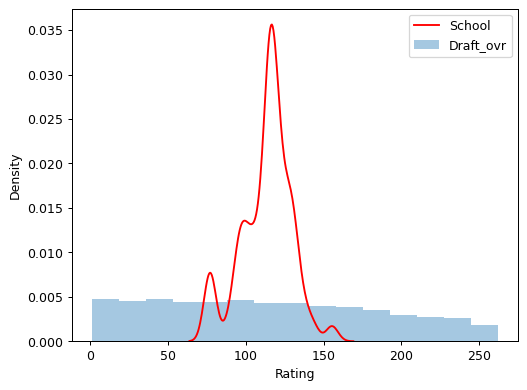

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.school, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['School', 'Draft_ovr']);

In [13]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
df_school_reg=tenc.fit_transform(data['school'],data['draft_ovr'])

data2 = df_school_reg.join(data.drop('school',axis = 1))
data2

,school,draft_round,draft_ovr,player_name,pos,ht,wt,forty,bench,vertical,broad_jump,cone,shuttle
4569,117.130144,5.0,176.0,Jared Abbrederis,WR,6-1,195.0,4.50,4.0,30.50,117.0,6.80,4.080
4570,118.636154,2.0,53.0,Davante Adams,WR,6-1,212.0,4.56,14.0,39.50,123.0,6.82,4.300
4571,110.533919,4.0,110.0,Mo Alexander,S,6-1,220.0,4.50,17.0,38.00,123.0,7.05,4.510
4572,126.991515,5.0,147.0,Ricardo Allen,CB,5-9,187.0,4.61,13.0,35.50,117.0,6.94,4.150
4573,118.957174,2.0,49.0,Jace Amaro,TE,6-5,265.0,4.74,28.0,33.00,118.0,7.42,4.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,103.901002,6.0,190.0,Luke Wypler,C,6-3,303.0,5.14,25.0,30.50,106.0,7.64,4.530
7995,76.041559,1.0,1.0,Bryce Young,QB,5-10,204.0,4.81,0.0,31.25,113.5,7.09,4.310
7996,76.041559,3.0,70.0,Byron Young,DT,6-3,294.0,5.06,24.0,26.00,108.0,7.68,4.650
7997,111.766460,3.0,77.0,Byron Young,EDGE,6-2,250.0,4.43,22.0,38.00,132.0,7.19,4.365


In [15]:
data['school_reg'] = df_school_reg['school']

In [17]:
data[['school','school_reg']]

,school,school_reg
4569,Wisconsin,117.130144
4570,Fresno State,118.636154
4571,Utah State,110.533919
4572,Purdue,126.991515
4573,Texas Tech,118.957174
...,...,...
7994,Ohio St.,103.901002
7995,Alabama,76.041559
7996,Alabama,76.041559
7997,Tennessee,111.766460


In [19]:
tenc2=ce.TargetEncoder() 
df_school_class=tenc2.fit_transform(data['school'],data['draft_round'])

data['school_class'] = df_school_class['school']

In [20]:
data[['school','school_reg', 'school_class']]

,school,school_reg,school_class
4569,Wisconsin,117.130144,3.807412
4570,Fresno State,118.636154,3.927169
4571,Utah State,110.533919,3.646310
4572,Purdue,126.991515,4.067231
4573,Texas Tech,118.957174,3.885553
...,...,...,...
7994,Ohio St.,103.901002,3.480828
7995,Alabama,76.041559,2.775496
7996,Alabama,76.041559,2.775496
7997,Tennessee,111.766460,3.736024


In [21]:
data.describe()

,draft_round,draft_ovr,wt,forty,bench,vertical,broad_jump,cone,shuttle,school_reg,school_class
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,3.790521,115.383412,244.009479,4.732116,19.337678,33.309147,117.323460,7.221645,4.376036,111.808308,3.693404
std,1.891486,70.734877,46.039904,0.292454,7.055264,3.993602,8.799448,0.357321,0.224774,12.873604,0.340122
min,1.000000,1.000000,155.000000,4.220000,0.000000,19.500000,82.000000,6.450000,3.810000,76.041559,2.775496
25%,2.000000,55.000000,205.000000,4.500000,15.000000,30.500000,112.000000,6.960000,4.210000,107.251969,3.526015
50%,4.000000,110.000000,234.000000,4.640000,20.000000,33.500000,118.500000,7.090000,4.310000,114.328370,3.749311
75%,5.000000,171.000000,286.750000,4.920000,24.000000,36.000000,123.000000,7.450000,4.500000,119.616484,3.909701
max,7.000000,262.000000,384.000000,5.850000,44.000000,45.000000,147.000000,8.410000,5.380000,140.548203,4.414840


In [23]:
tenc3=ce.TargetEncoder() 
df_pos_class=tenc3.fit_transform(data['pos'],data['draft_round'])

data['pos_class'] = df_pos_class['pos']

tenc4=ce.TargetEncoder() 
df_pos_reg=tenc4.fit_transform(data['pos'],data['draft_ovr'])

data['pos_reg'] = df_pos_reg['pos']

In [24]:
data[['pos','pos_reg', 'pos_class']]

,pos,pos_reg,pos_class
4569,WR,116.253571,3.792857
4570,WR,116.253571,3.792857
4571,S,115.920286,3.811594
4572,CB,111.781893,3.699588
4573,TE,121.696487,3.942617
...,...,...,...
7994,C,117.323958,3.795044
7995,QB,102.106218,3.452892
7996,DT,112.685100,3.724411
7997,EDGE,103.412595,3.457217


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 4569 to 7998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   draft_round   2110 non-null   float64
 1   draft_ovr     2110 non-null   float64
 2   player_name   2110 non-null   object 
 3   pos           2110 non-null   object 
 4   school        2110 non-null   object 
 5   ht            2110 non-null   object 
 6   wt            2110 non-null   float64
 7   forty         2110 non-null   float64
 8   bench         2110 non-null   float64
 9   vertical      2110 non-null   float64
 10  broad_jump    2110 non-null   float64
 11  cone          2110 non-null   float64
 12  shuttle       2110 non-null   float64
 13  school_reg    2110 non-null   float64
 14  school_class  2110 non-null   float64
 15  pos_class     2110 non-null   float64
 16  pos_reg       2110 non-null   float64
dtypes: float64(13), object(4)
memory usage: 361.3+ KB


In [29]:
new = data['ht'].str.split('-',n=1,expand=True)
new = new.astype('int')

data['height'] = new[0]*12 + new[1]

In [30]:
data[['ht','height']]

,ht,height
4569,6-1,73
4570,6-1,73
4571,6-1,73
4572,5-9,69
4573,6-5,77
...,...,...
7994,6-3,75
7995,5-10,70
7996,6-3,75
7997,6-2,74


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 4569 to 7998
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   draft_round   2110 non-null   float64
 1   draft_ovr     2110 non-null   float64
 2   player_name   2110 non-null   object 
 3   pos           2110 non-null   object 
 4   school        2110 non-null   object 
 5   ht            2110 non-null   object 
 6   wt            2110 non-null   float64
 7   forty         2110 non-null   float64
 8   bench         2110 non-null   float64
 9   vertical      2110 non-null   float64
 10  broad_jump    2110 non-null   float64
 11  cone          2110 non-null   float64
 12  shuttle       2110 non-null   float64
 13  school_reg    2110 non-null   float64
 14  school_class  2110 non-null   float64
 15  pos_class     2110 non-null   float64
 16  pos_reg       2110 non-null   float64
 17  height        2110 non-null   int32  
dtypes: float64(13), int32(1),

In [32]:
data.to_pickle('dataset_all_columns.pkl')

In [35]:
data.drop(['player_name','pos','school','ht'], axis=1,inplace=True)

In [36]:
data.to_pickle('dataset_all_columns_model_ready.pkl')

In [51]:
X = data.drop(['draft_ovr','draft_round','school_class','pos_class','school_reg','pos_reg'],axis=1)

In [52]:
X.head()

,wt,forty,bench,vertical,broad_jump,cone,shuttle,height
4569,195.0,4.50,4.0,30.5,117.0,6.80,4.08,73
4570,212.0,4.56,14.0,39.5,123.0,6.82,4.30,73
4571,220.0,4.50,17.0,38.0,123.0,7.05,4.51,73
4572,187.0,4.61,13.0,35.5,117.0,6.94,4.15,69
4573,265.0,4.74,28.0,33.0,118.0,7.42,4.30,77


In [53]:
y=data.draft_ovr
y.head()

4569    176.0
4570     53.0
4571    110.0
4572    147.0
4573     49.0
Name: draft_ovr, dtype: float64

In [54]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [55]:
#Deciding on best model for the data
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
head = 10
for model in regressors[:head]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    print(model)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print(cross_val_score(model,X,y,cv=cv))
    print()

KNeighborsRegressor()
	Explained variance: -0.14680881738234253
	Mean absolute error: 62.285606060606064
	R2 score: -0.14781921317074143
[-0.12267123 -0.06252962 -0.19154768 -0.047238   -0.25039265]

GradientBoostingRegressor()
	Explained variance: 0.04629304605009943
	Mean absolute error: 58.226465268160375
	R2 score: 0.04364105259180384
[0.07549825 0.03618659 0.07592763 0.11132543 0.04947216]

KNeighborsRegressor()
	Explained variance: -0.14680881738234253
	Mean absolute error: 62.285606060606064
	R2 score: -0.14781921317074143
[-0.12267123 -0.06252962 -0.19154768 -0.047238   -0.25039265]

ExtraTreesRegressor()
	Explained variance: -0.03449682894583783
	Mean absolute error: 60.62647727272727
	R2 score: -0.03928231704315466
[ 0.01940655 -0.07377751 -0.02459889  0.04779206  0.00682646]

RandomForestRegressor()
	Explained variance: 0.025784824013756702
	Mean absolute error: 58.825595012626266
	R2 score: 0.02321411744602242
[ 0.03669499 -0.036493   -0.00095965  0.09736616  0.03422217]

D

In [43]:
#Hyperparameter tuning for GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.12542941817912812

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}


In [45]:
#Hyperparameter tuning for ExtraTreesRegressor()
param_grid = {
    'n_estimators': [10,50,100],
    'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    #'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor ()

gcv = GridSearchCV(model,param_grid,cv=5,n_jobs=-1).fit(X_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gcv.best_estimator_)
print("\n The best score across ALL searched params:\n",gcv.best_score_)
print("\n The best parameters across ALL searched params:\n",gcv.best_params_)

c:\Users\VonHinson\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
7200 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3814 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\VonHinson\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\VonHinson\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\VonHinson\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\VonHinson\a

 Results from Grid Search 

 The best estimator across ALL searched params:
 ExtraTreesRegressor(bootstrap=True, criterion='poisson', max_depth=16,
                    max_features='log2', min_samples_split=6, warm_start=True)

 The best score across ALL searched params:
 0.1254800271763028

 The best parameters across ALL searched params:
 {'bootstrap': True, 'criterion': 'poisson', 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100, 'warm_start': True}


From the results above, more features are needed to accurately predict draft position. 
<br>
Possible improvements would be to change the encoding for the colleges but even without those being used. There was not much improvement. 

In [46]:
X.columns

Index(['wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle',
       'school_reg', 'school_class', 'pos_class', 'pos_reg', 'height'],
      dtype='object')